In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

In [50]:
data
data[data['RestingBP'] >= 140]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_range
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,40-44
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,45-49
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-54
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,35-39
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1,65-69
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1,60-64
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1,55-59
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1,55-59


## Chest Pain Type Description
TA = Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin 
 
ATA = When one experiences chest pain that doesn't meet the criteria for angina, it's known as atypical chest pain. Angina chest pain is a pressure or squeezing like sensation that is usually caused when your heart muscle doesn't get an adequate supply of oxygenated blood

NAP = Nonanginal chest pain is a common symptom of many conditions, ranging from gastrointestinal problems to psychiatric conditions. It may feel like a pressure or squeezing pain behind the breast bone. People should speak with a healthcare professional to find out what may be causing their chest pain

ASY = Silent (asymptomatic) myocardial ischemia (SMI) is defined as a transient alteration in myocardial perfusion in the absence of chest pain or the usual anginal equivalents.

## ASY Pain Type
Looking for a connection to predict cardiovasicular disease in a person that is ASY

/var/folders/wm/nm5mw78566v_9fmqckr_7lqm0000gn/T/ipykernel_14460/2992408445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asy_heart['High Cholesterol'] = asy_heart['Cholesterol'] > 240


<Axes: title={'center': 'High Cholesterol in Asymptomatic Patients With Heart Disease'}, xlabel='High Cholesterol', ylabel='Number of Patients'>

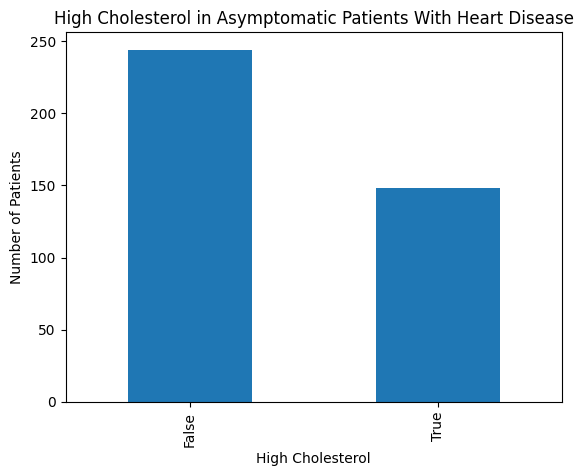

In [43]:
#Creating the dataframe that only contains asymptomatic patients
asy_heart = data[data['ChestPainType'] == 'ASY']
asy_heart['High Cholesterol'] = asy_heart['Cholesterol'] > 240
#Manipulating the data to get the number of asymptomatic patients with heart disease
asy_heart_1 = asy_heart[asy_heart['HeartDisease'] == 1]

asy_heart_1['High Cholesterol'].value_counts().plot(kind='bar', title='High Cholesterol in Asymptomatic Patients With Heart Disease', ylabel='Number of Patients', xlabel='High Cholesterol')

<Axes: title={'center': 'High Cholesterol in Asymptomatic Patients Without Heart Disease'}, xlabel='High Cholesterol', ylabel='Number of Patients'>

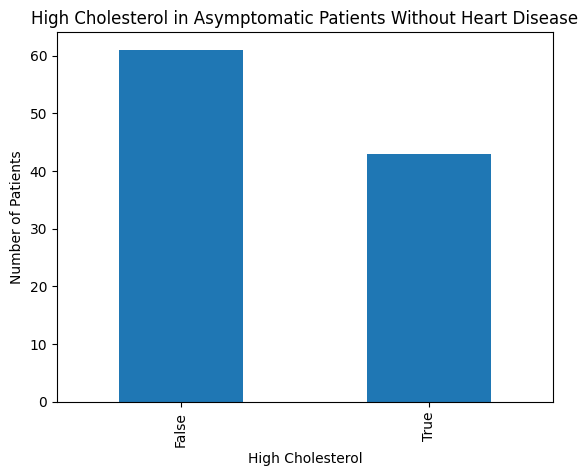

In [44]:
#Manipulating the data to get the number of asymptomatic patients without heart disease
asy_heart_0 = asy_heart[asy_heart['HeartDisease'] == 0]
asy_heart_0['High Cholesterol'].value_counts().plot(kind='bar', title='High Cholesterol in Asymptomatic Patients Without Heart Disease', xlabel='High Cholesterol', ylabel='Number of Patients')

## Graphs For High Cholesterol Analysis
The graphs above show that high choleserol can be an indicator of heart disease, but I need to find another variable that will increase the predection of a patient with high cholesterol having heart disease. I also need this for any possible wrong diagnosis. 

## RestingBP and High Cholesterol 
When someone has a high resting bp and high cholesterol how often do they have heart disease?

<Axes: title={'center': 'Asymptomatic Patients with High Cholesterol and High Blood Pressure'}, xlabel='Heart Disease', ylabel='Number of Patients'>

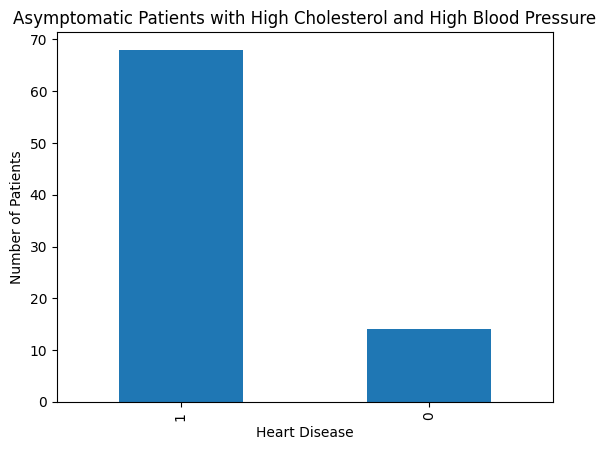

In [58]:
Bp_cholest = asy_heart[(asy_heart['RestingBP'] >= 140) & (asy_heart['High Cholesterol'] == True)]
Bp_cholest['HeartDisease'].value_counts().plot(kind='bar', title='Asymptomatic Patients with High Cholesterol and High Blood Pressure', xlabel='Heart Disease', ylabel='Number of Patients')

## Does age play a role in having heart disease?
Looking at how age plays a role in having heart disease.

/var/folders/wm/nm5mw78566v_9fmqckr_7lqm0000gn/T/ipykernel_14460/3518854574.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_range')['HeartDisease'].mean().plot(kind='bar', title='Heart Disease percentage by Age', xlabel='Age Range', ylabel='Heart Disease')


<Axes: title={'center': 'Heart Disease percentage by Age'}, xlabel='Age Range', ylabel='Heart Disease'>

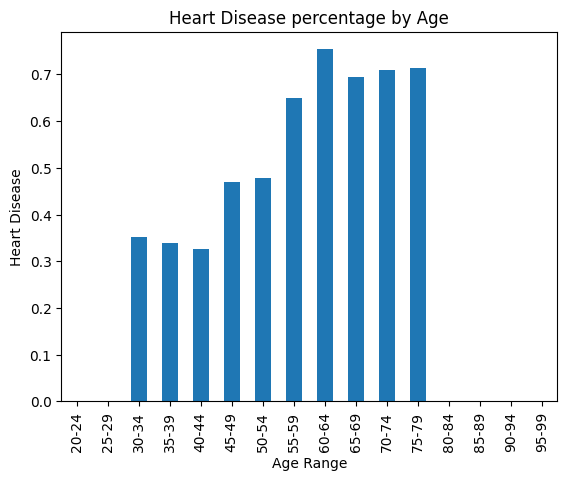

In [41]:
#Grouping by age to see if age plays a role in heart disease
#age_grouped = data.groupby('Age')['HeartDisease'].mean()
age_bins = range(20, 101, 5)  # Starting from 20 up to 100 in 5-year intervals
age_labels = [f'{start}-{start+4}' for start in age_bins[: -1]]
data['age_range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data.groupby('age_range')['HeartDisease'].mean().plot(kind='bar', title='Heart Disease percentage by Age', xlabel='Age Range', ylabel='Heart Disease')


## Graph Above Analysis
The graph displays that as people get older they are more likely to develop heart disease. This is shown by the upward trend in the amount of patients in the data that do have heart disease. 

## Does Gender Affect Heart Disease?
Does being a certain gender affect weather a person has heart disease or not?

<Axes: title={'center': 'Heart Disease By Sex'}, xlabel='Sex', ylabel='Number of Patients With Heart Disease'>

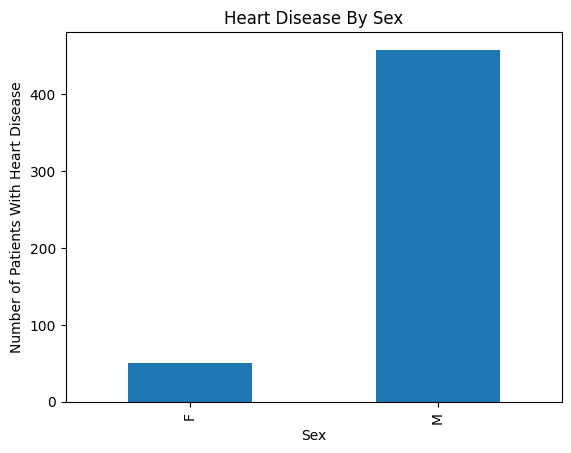

In [69]:
#grouping by gender to see how it impacts being diagnosed with heart disease 
grouped_sex = data.groupby('Sex')['HeartDisease'].sum()
grouped_sex.plot(kind = 'bar', title='Heart Disease By Sex', xlabel= 'Sex', ylabel='Number of Patients With Heart Disease')

## Graph Analysis of Heart Disease By Sex
In this data set males are more likely to be diagnosed with heart disease then females

In [68]:
#data[(data['HeartDisease'] == 1) & data['Sex'] == 'F']


KeyError: False